In [2]:
import numpy as np
import scipy as sp
from mnist_tools import *
from plot_tools import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from cvxopt import matrix
from cvxpy import *
from skimage.measure import block_reduce
from numpy import linalg as LA

In [3]:
datafile = "mnist_all.mat" #Change if you put the file in a different path
train = load_train_data(datafile)
test, testLabels = load_test_data(datafile)

In [10]:
d=0
X = train[d]
X = np.transpose(X).reshape(28, 28, 100)
X = block_reduce(X, block_size=(4, 5, 1), func=np.max)
X.shape

(7, 6, 100)

In [31]:
n=len(train)
W =[]
for d in range(n):
    X = train[d]
    X = np.transpose(X).reshape(28, 28, 100)
    X = block_reduce(X, block_size=(4, 4, 1), func=np.max)
    #print(X.shape)
    X = normalize(X.reshape(49,100), axis=0, norm='l2')
    y = test[0]
    y = y.reshape(28,28,1)
    y = block_reduce(y, block_size=(4, 4, 1), func=np.max)
    y = normalize(y.reshape(49,1), axis=0, norm='l2')
    w = Variable(100,1)
    obj = Minimize(norm(w,1))
    const = [X * w == y]
    prob = Problem(obj,const)
    result = prob.solve(verbose=True)
    W.append(np.array(w.value))

/Users/Bangz/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)



ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +4e+02  9e-01  1e-02  1e+00  2e+00    ---    ---    2  1  - |  -  - 
 1  +1.347e+01  +1.356e+01  +1e+02  5e-01  1e-03  3e-01  6e-01  0.8047  8e-02   1  1  1 |  0  0
 2  +2.191e+01  +2.195e+01  +3e+01  2e-01  3e-04  1e-01  2e-01  0.7710  8e-02   1  1  1 |  0  0
 3  +2.657e+01  +2.658e+01  +9e+00  4e-02  7e-05  3e-02  4e-02  0.7880  5e-02   1  1  1 |  0  0
 4  +2.765e+01  +2.765e+01  +3e+00  1e-02  2e-05  1e-02  1e-02  0.7258  8e-02   1  1  1 |  0  0
 5  +2.796e+01  +2.797e+01  +9e-01  5e-03  7e-06  4e-03  5e-03  0.7096  6e-02   1  1  1 |  0  0
 6  +2.806e+01  +2.806e+01  +2e-01  1e-03  2e-06  9e-04  1e-03  0.8956  1e-01   1  1  1 |  0  0
 7  +2.809e+01  +2.809e+01  +3e-02  2e-04  3e-07  1e-04  2e-04  0.8419  1e-02   1  1  1 |  0  0
 8  +2.809e+01  +2.809e+01  +6e-03  3e-05  5e-

In [33]:
pred = 0
res = float("inf")
for d in range(n):
    X = train[d]
    X = np.transpose(X).reshape(28, 28, 100)
    X = block_reduce(X, block_size=(4, 4, 1), func=np.max)
    X = normalize(X.reshape(49,100), axis=0, norm='l2')
    y = test[0]
    y = y.reshape(28,28,1)
    y = block_reduce(y, block_size=(4, 4, 1), func=np.max)
    y = normalize(y.reshape(49,1), axis=0, norm='l2')
    if W[d].size > 1:
        #print('d : ', d, 'w : ', LA.norm(W[d]))
        temp = LA.norm(y - np.dot(X, W[d]))
        print('d : ', d, 'res : ', temp)
        if temp < res:
            res = temp
            pred = d
            #print(res,d)
print('Prediction :', pred, 'weights', W[pred])        

d :  0 res :  6.27536450868e-14
d :  2 res :  3.63549129399e-12
d :  3 res :  3.64817860983e-14
d :  4 res :  6.11548046565e-14
d :  5 res :  2.1827307899e-14
d :  7 res :  1.58663278132e-11
d :  8 res :  3.46307419792e-13
d :  9 res :  3.82331918843e-12
Prediction : 5 weights [[ -4.70329910e-12]
 [  3.74730550e-12]
 [ -4.03825294e-11]
 [ -1.37189272e-11]
 [ -3.82919767e-01]
 [  2.01452544e-01]
 [ -1.65177108e-11]
 [  5.58240119e-15]
 [ -2.17395115e-12]
 [  8.87725128e-02]
 [  2.02482895e-10]
 [ -5.24789991e-13]
 [ -1.08022387e-12]
 [ -1.02967233e-11]
 [ -3.60847669e-11]
 [ -4.58268717e-12]
 [  8.07165048e-03]
 [  3.00163132e-11]
 [  1.63320874e-02]
 [ -4.20199940e-12]
 [ -2.66938758e-01]
 [  2.92962811e-01]
 [  4.22490815e-12]
 [ -5.00169310e-01]
 [ -7.36381519e-12]
 [ -8.33559615e-12]
 [  9.49036118e-12]
 [ -1.76993102e-02]
 [ -6.10126250e-02]
 [  7.29492568e-13]
 [  2.97575268e-01]
 [  1.87910591e-12]
 [ -1.06909591e-11]
 [ -7.71139112e-02]
 [  2.58772478e-12]
 [ -2.02273103e-11]
 [

/Users/Bangz/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


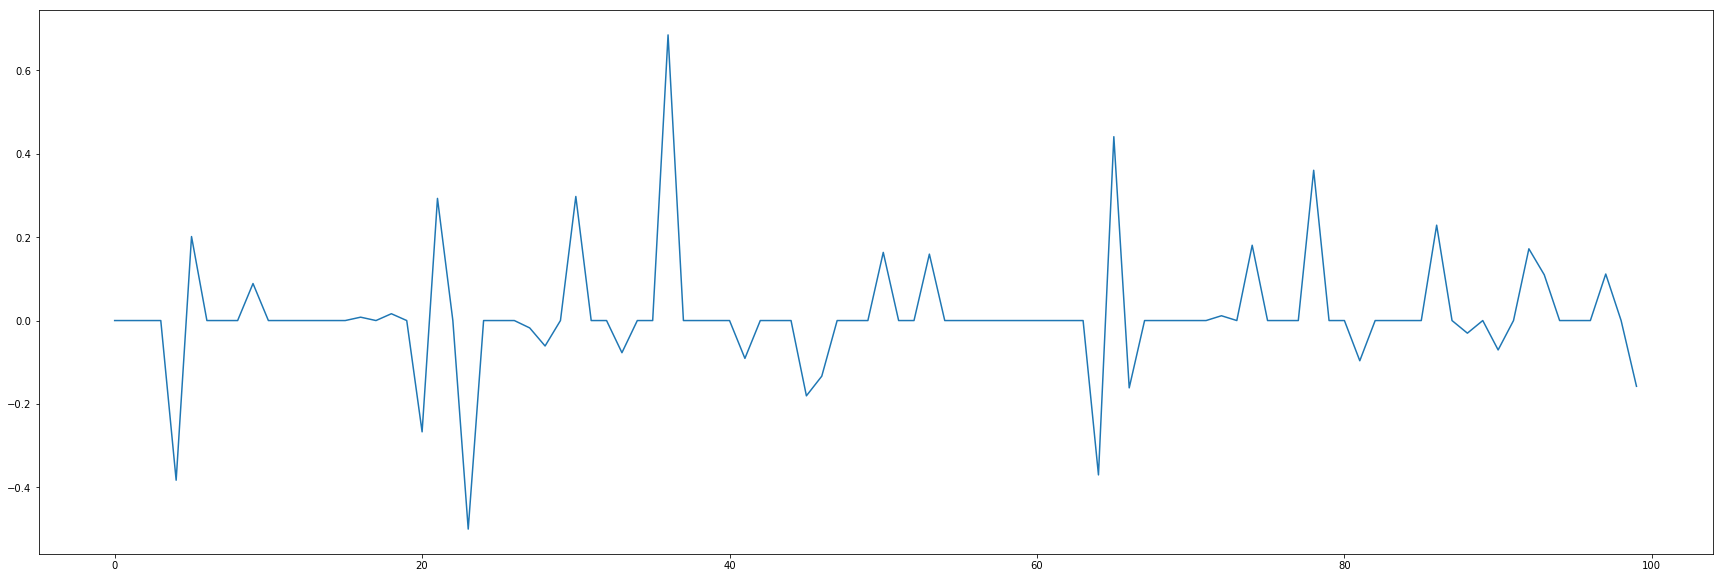

In [46]:
plt.figure(figsize=(30,10))
plt.plot(W[5])
plt.show()

In [52]:
np.where(W[5] < -0.2)

(array([ 4, 20, 23, 64]), array([0, 0, 0, 0]))

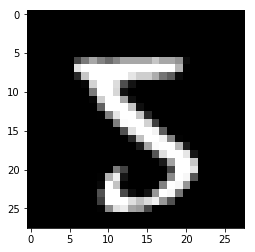

In [54]:
d=5
X = train[d]
X = X[23]
A= X.reshape(28, 28, 1)
plt.imshow(A[:,:,0], cmap='gray')
plt.show()

In [4]:
d = 7
X = train[d]
X = np.transpose(X).reshape(28, 28, 100)
X = block_reduce(X, block_size=(3, 3, 1), func=np.mean)
X = normalize(X.reshape(100,100), axis=1, norm='l2')
y = test[2]
y = y.reshape(28,28,1)
y = block_reduce(y, block_size=(3, 3, 1), func=np.mean)
y = normalize(y.reshape(100,1), axis=1, norm='l2')
w = Variable(100,1)
obj = Minimize(norm(w,1))
const = [X * w == y]
prob = Problem(obj,const)
result = prob.solve(verbose=True)
print(LA.norm(w.value))
#W.append(np.array(w.value))


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +3e+02  8e-01  1e-02  1e+00  2e+00    ---    ---    1  1  - |  -  - 
 1  +3.453e+01  +3.456e+01  +6e+01  3e-01  9e-04  2e-01  3e-01  0.8707  7e-02   1  1  1 |  0  0
 2  +4.637e+01  +4.638e+01  +2e+01  7e-02  2e-04  7e-02  9e-02  0.7476  5e-02   1  1  1 |  0  0
 3  +4.899e+01  +4.899e+01  +6e+00  2e-02  5e-05  2e-02  3e-02  0.7482  1e-01   1  1  1 |  0  0
 4  +4.976e+01  +4.977e+01  +2e+00  9e-03  2e-05  1e-02  1e-02  0.6217  8e-02   1  1  1 |  0  0
 5  +5.013e+01  +5.013e+01  +7e-01  3e-03  6e-06  3e-03  4e-03  0.8151  1e-01   1  1  1 |  0  0
 6  +5.028e+01  +5.028e+01  +9e-02  3e-04  7e-07  4e-04  5e-04  0.9282  6e-02   1  1  1 |  0  0
 7  +5.030e+01  +5.030e+01  +5e-03  2e-05  4e-08  2e-05  2e-05  0.9536  6e-03   1  1  1 |  0  0
 8  +5.030e+01  +5.030e+01  +5e-05  2e-07  4e-

In [ ]:
d= 2
X = test[d]
print(testLabels[d])
A= X.reshape(28, 28, 1)
plt.imshow(A[:,:,0], cmap='gray')
plt.show()

In [43]:
X = train[1]
X = np.transpose(X).reshape(28, 28, 100)
X = block_reduce(X, block_size=(3, 3, 1), func=np.max)
X.shape

(10, 10, 100)

(10, 10, 100)